# Motion of toy car

August 28, 2018

In [28]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sg
import serial
import time

matplotlib.rcParams['figure.figsize'] = [10, 4]

SAMPLE_NUMS = 260  # sec
SAMPLING_RATE = 80.0  # Hz
GYRO_RESOLUTION = 250.0 / 32768.0
ACCEL_RESOLUTION = 2.0 / 32768.0
RAW_DATA_FILE = './20180828_car.csv'
DISTANCE_DATA_FILE = './20180828_car_distance.csv'
TIME_INTERVAL = 260.0 / SAMPLING_RATE  # sec

## Plotting graph

Text(0.5,1,'Distance')

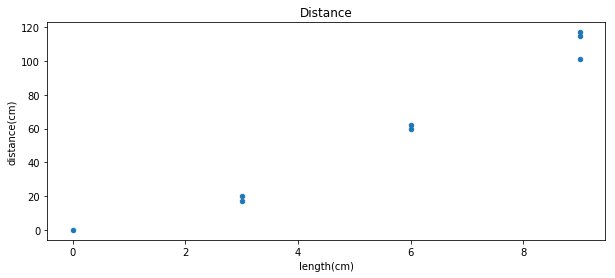

In [29]:
df = pd.read_csv(DISTANCE_DATA_FILE, dtype=np.int16)
df.plot.scatter(x='length', y='distance')
plt.xlabel('length(cm)')
plt.ylabel('distance(cm)')
plt.title('Distance')

In [30]:
df = pd.read_csv(RAW_DATA_FILE, dtype=np.int16)

gres = lambda v: v * GYRO_RESOLUTION
ares = lambda v: v * ACCEL_RESOLUTION
to_time = lambda v: v / SAMPLING_RATE
df[['gx', 'gy', 'gz']] = df[['gx', 'gy', 'gz']].apply(gres)
df[['ax', 'ay', 'az']] = df[['ax', 'ay', 'az']].apply(ares)
df[['cnt']] = df[['cnt']].apply(to_time)
df.set_index('cnt', drop=True, inplace=True)
measurements = df.tail(1).iloc[0,0] + 1
df.tail()

,id,gx,gy,gz,ax,ay,az,pls
cnt,,,,,,,,
51.9375,7,-0.885010,-0.061035,-4.837036,-0.011230,-0.014038,0.974365,0
51.9500,7,0.762939,-1.831055,-0.518799,-0.010315,-0.012573,0.978394,0
51.9625,7,0.427246,-2.532959,-3.692627,-0.010193,-0.010742,0.973999,0
51.9750,7,0.442505,4.531860,-1.144409,-0.009888,-0.015015,0.977295,0
51.9875,7,1.968384,-0.503540,-0.259399,-0.011902,-0.011536,0.979553,0


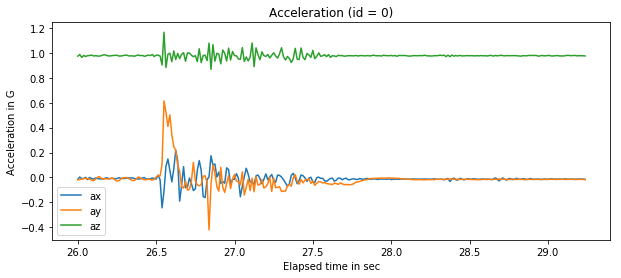

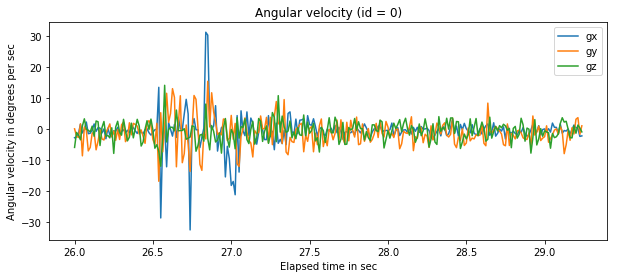

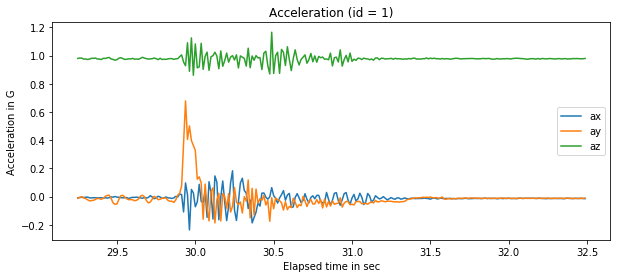

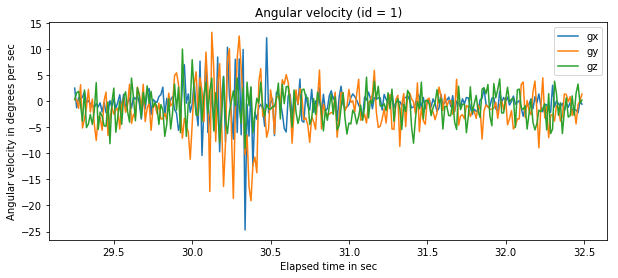

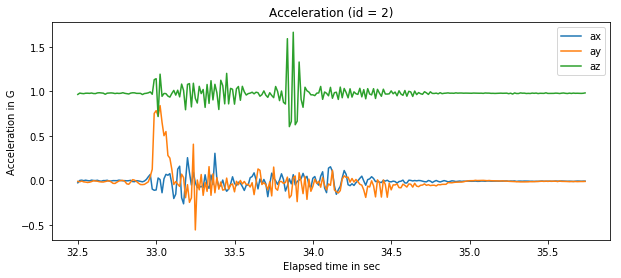

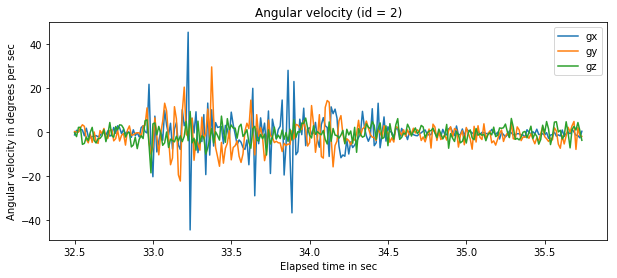

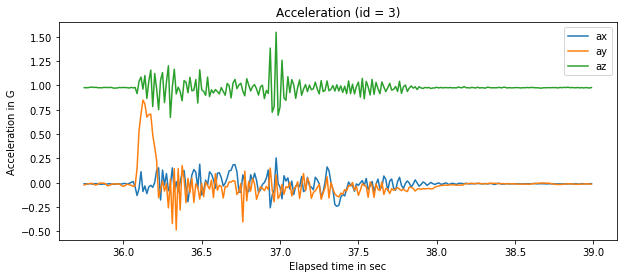

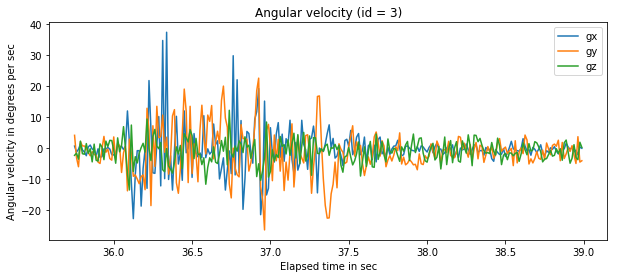

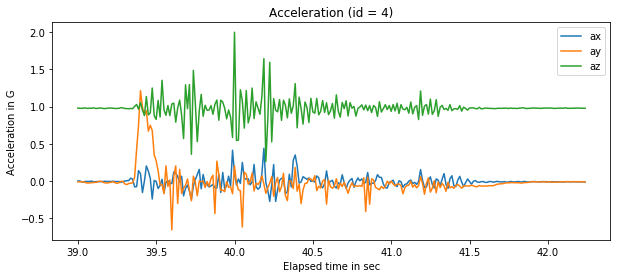

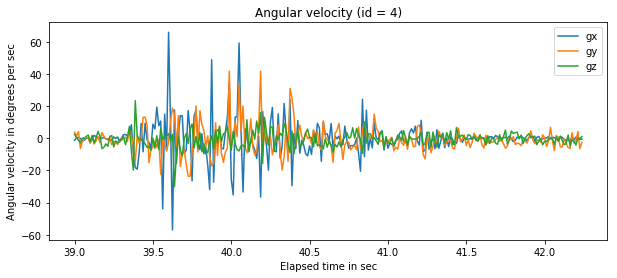

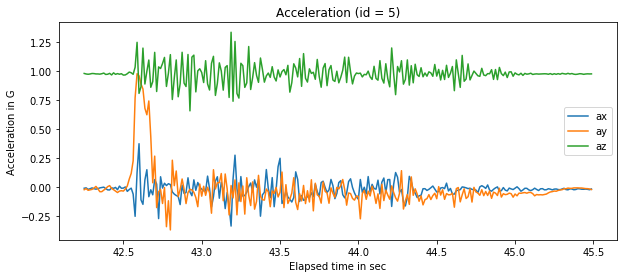

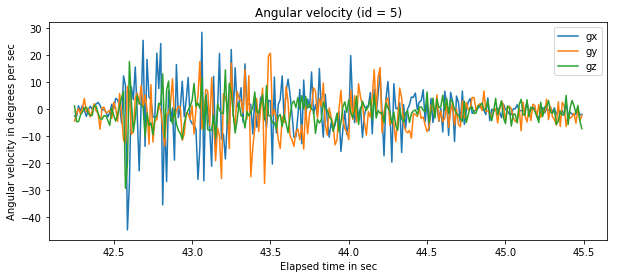

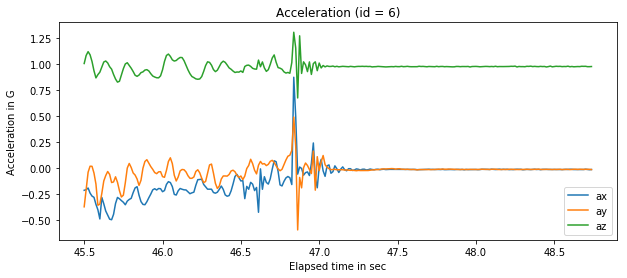

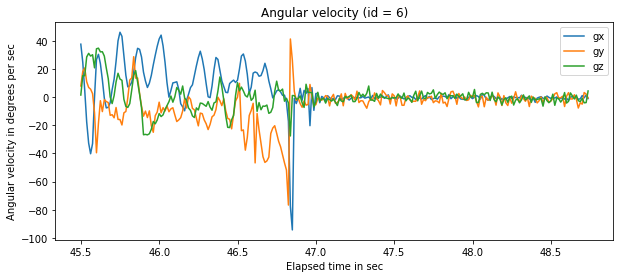

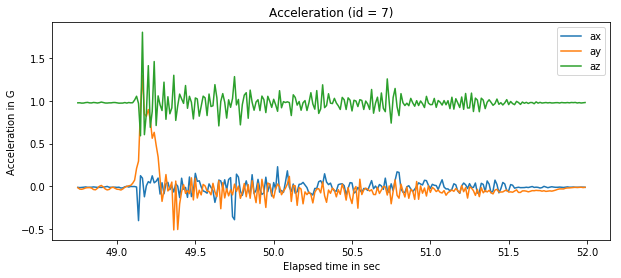

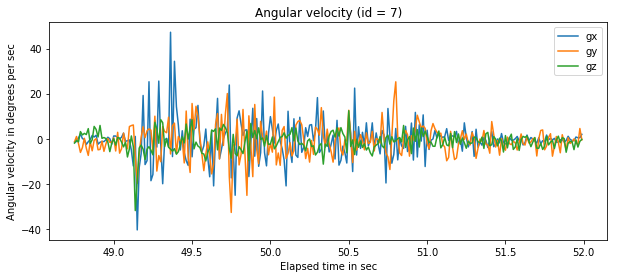

In [31]:
for i in range(measurements):
    df2 = df[df['id']==i]
    ax = df2[['ax', 'ay', 'az']].plot()
    ax.set_xlabel('Elapsed time in sec')
    ax.set_ylabel('Acceleration in G')
    ax.set_title('Acceleration (id = {})'.format(i))
    ax = df2[['gx', 'gy', 'gz']].plot()
    ax.set_xlabel('Elapsed time in sec')
    ax.set_ylabel('Angular velocity in degrees per sec')
    ax.set_title('Angular velocity (id = {})'.format(i))

In [32]:
CUTOFF = 20.0
b, a = sg.butter(5, CUTOFF/SAMPLING_RATE, btype='low')
df[['ax', 'ay', 'az']] = df[['ax', 'ay', 'az']].apply(lambda row: sg.lfilter(b, a, row))

In [33]:
CUTOFF = 10.0
b, a = sg.butter(5, CUTOFF/SAMPLING_RATE, btype='low')
df[['gx', 'gy', 'gz']] = df[['gx', 'gy', 'gz']].apply(lambda row: sg.lfilter(b, a, row))

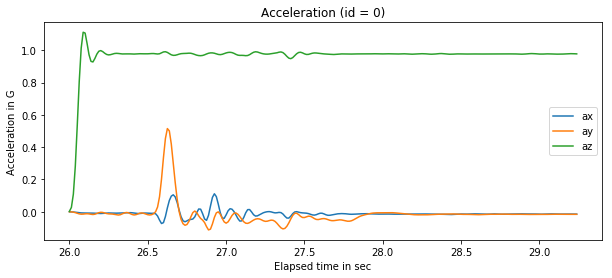

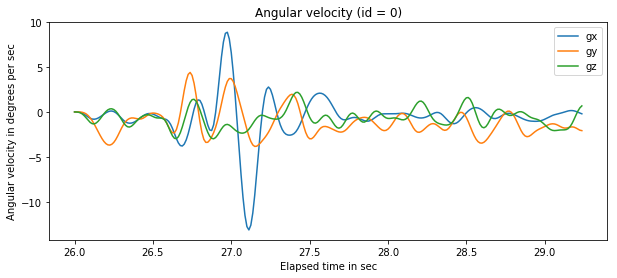

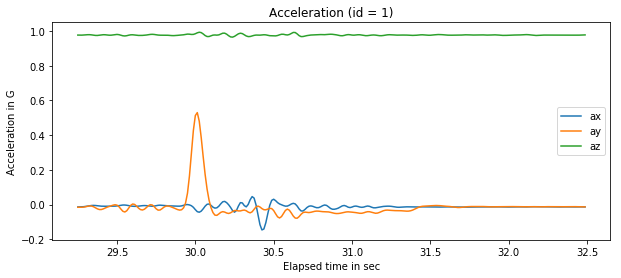

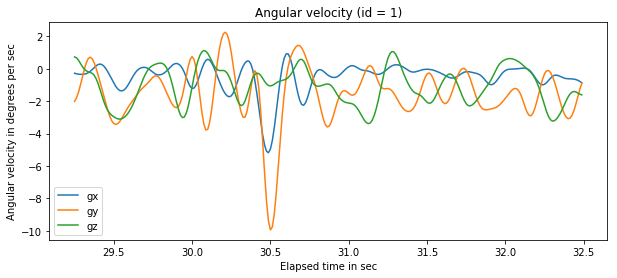

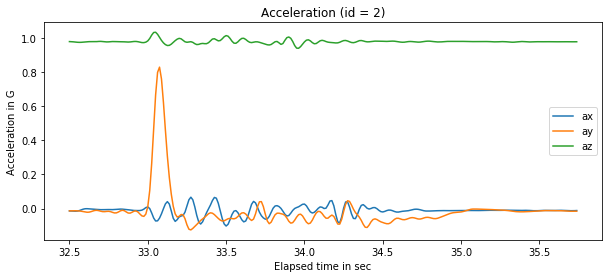

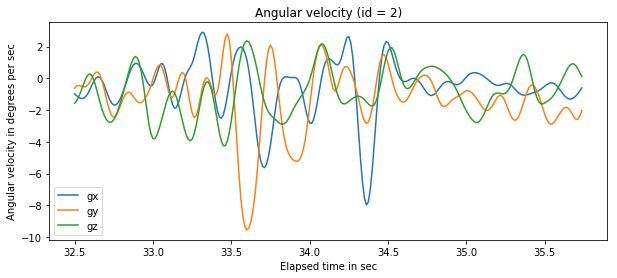

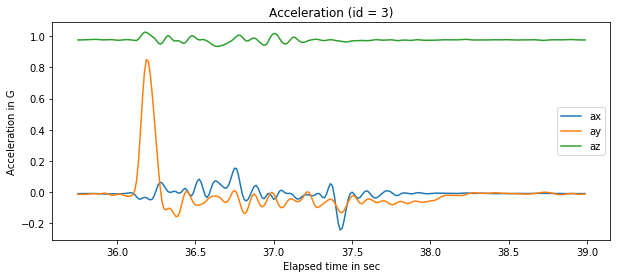

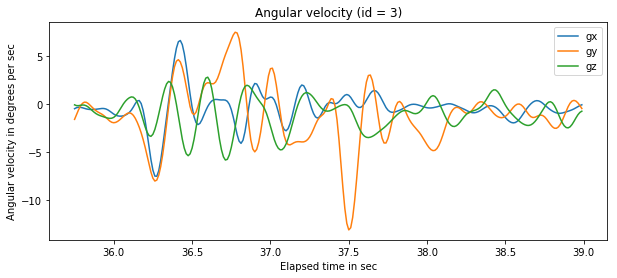

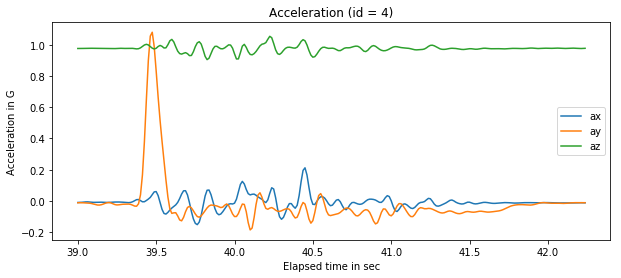

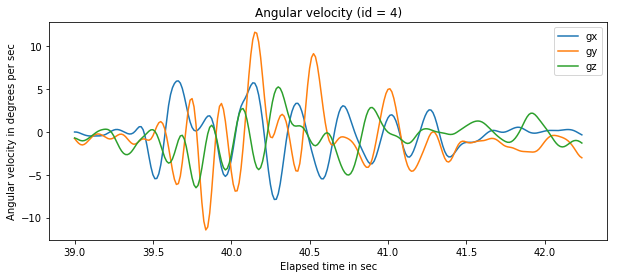

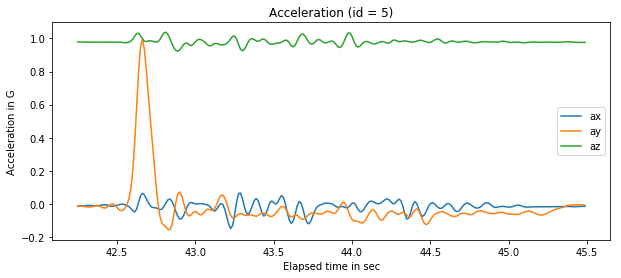

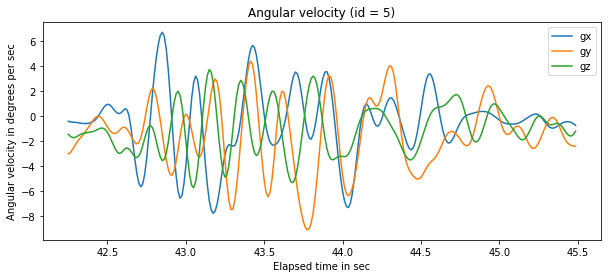

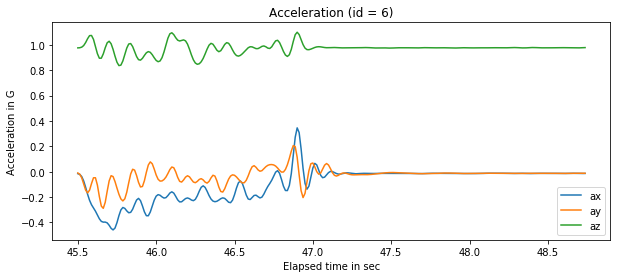

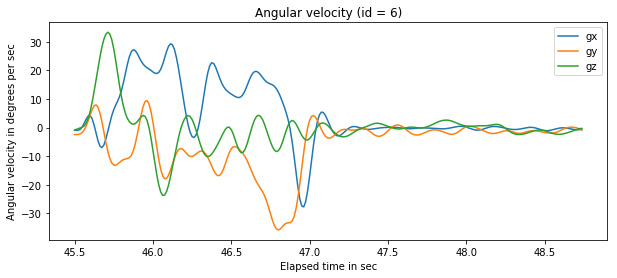

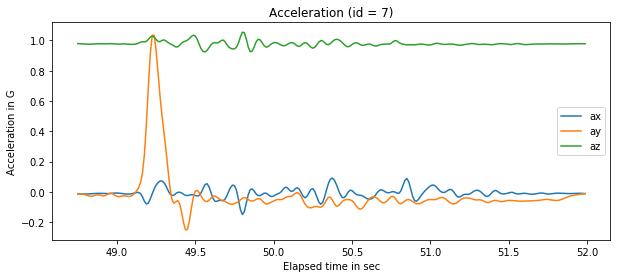

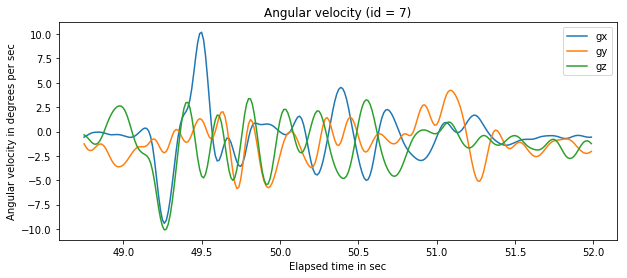

In [34]:
for i in range(measurements):
    df2 = df[df['id']==i]
    ax = df2[['ax', 'ay', 'az']].plot()
    ax.set_xlabel('Elapsed time in sec')
    ax.set_ylabel('Acceleration in G')
    ax.set_title('Acceleration (id = {})'.format(i))
    ax = df2[['gx', 'gy', 'gz']].plot()
    ax.set_xlabel('Elapsed time in sec')
    ax.set_ylabel('Angular velocity in degrees per sec')
    ax.set_title('Angular velocity (id = {})'.format(i))